In [8]:
using PyPlot,FourierFlows

┌ Info: FourierFlows will use 6 threads
└ @ FourierFlows /home/doraho/.julia/packages/FourierFlows/tVoz9/src/FourierFlows.jl:123


# Force module for cylindrical Coordinate
Considering the following force
$$\vec{f} = f_r \hat{r} + f_z\hat{z},$$ 
where $\nabla\cdot \vec{f} = 0$.

In cylindrical Coordinate, we can solve the following equation,
$\nabla\cdot \vec{f} = \frac{1}{r}\frac{\partial r f_r}{\partial r} + \frac{\partial f_z }{\partial z}=0$.

We can always assume, $f_z$ is not a function of r such that we arrive at the solution of :

$$f_r = -\frac{r}{2}\frac{\partial f_z }{\partial z}$$.

We consider $f_z = A(z) B(\theta)$, where $A(z)$ control the strength along axial direction while $B(\theta)$ control the scale of injection. One candidate could be:
$$f_z = (cos(z) +1)sin(k_f \theta), and$$

$$f_r = \frac{r}{2}sin(z)sin(k_f \theta) .$$

As a result, the force would be maximum at the edge of the tube and become zeros at the center. In addition, a constant $A$ and a random variable $\phi$ could be added with $\vec{f}$ to control the strength of energy injection and randomless of the force.

The final form would be :


$$f_z = A (cos(z) +1)sin(k_f \theta + \phi)$$

$$f_r = A \frac{r}{2}sin(z)sin(k_f \theta + \phi ) .$$

In [38]:
#get the Uθ and Ur
function xy_to_polar(ux,uy;L=2π)
#=
  Function for converting x-y vector to r-θ vector, using linear transform
    [x']  =  [cos(θ) -rsin(θ)][r']
    [y']     [sin(θ)  rcos(θ)][θ']
    So e_r =  cosθ ̂i + sinθ ̂j
       e_θ = -sinθ ̂j + cosθ ̂j
=#    
  nx,ny,nz = size(ux);  
  dev  = CPU();
  Lx = Ly = L;
  T  = Float32;
  grid = TwoDGrid(dev, nx, Lx, ny, Ly; T=T)
  Ur = zeros(nx,ny,nz);
  Uθ = zeros(nx,ny,nz);
  for j ∈ 1:ny, i ∈ 1:nz
    r = sqrt(grid.x[i]^2+grid.y[j]^2);
    θ = atan(grid.y[j],grid.x[i]) ;
    θ = isnan(θ) ? π/2 : θ;
    sinθ = sin(θ);
    cosθ = cos(θ);    
    Uθ[i,j,:] .= @. -sinθ*ux[i,j,:] + cosθ*uy[i,j,:];    
    Ur[i,j,:] .= @.  cosθ*ux[i,j,:] + sinθ*uy[i,j,:];    
  end
    return Ur,Uθ;
end


function force_apply(nx,ny,nz;kf=1,A=1,L=2π)  
  dev  = CPU();
  Lx = Ly = Lz = L;
  T  = Float32;
  grid = ThreeDGrid(dev, nx, Lx, ny, Ly, nz, Lz; T=T)
  Ux = zeros(nx,ny,nz);
  Uy = zeros(nx,ny,nz);
  Uz = zeros(nx,ny,nz);
  for k ∈ 1:nz, j ∈ 1:ny, i ∈ 1:nz
    x,y,z = grid.x[i],grid.y[j],grid.z[k];
    r = sqrt(grid.x[i]^2+grid.y[j]^2);
    θ = atan(grid.y[j],grid.x[i]) ;
    θ = isnan(θ) ? π/2 : θ;
    sinθ = sin(θ);
    cosθ = cos(θ);    
    Ux[i,j,k] = A*r/2*sin(z)*sin(kf*θ)*cosθ;    
    Uy[i,j,k] = A*r/2*sin(z)*sin(kf*θ)*-sinθ;
    Uz[i,j,k] = A*(cos(z)+1)*sin(kf*θ);
  end
  return Ux,Uy,Uz  
end

force_apply (generic function with 1 method)

In [60]:
nx,ny,nz = 256,256,256
Ux,Uy,Uz = force_apply(nx,ny,nz;kf=40,A=1);

In [61]:
Ur,Uθ =  xy_to_polar(Ux,Uy;L=2π);

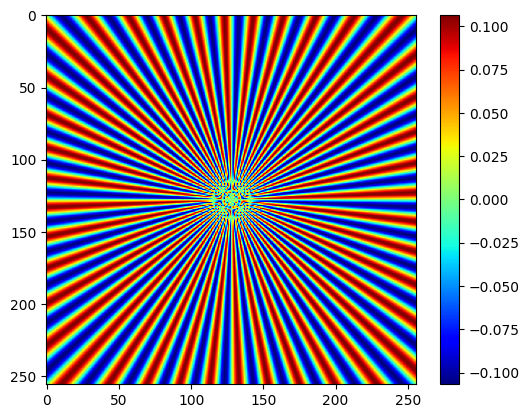

PyObject <matplotlib.colorbar.Colorbar object at 0x7f136010f9a0>

In [62]:
imshow(Uz[:,:,20],cmap="jet");colorbar()

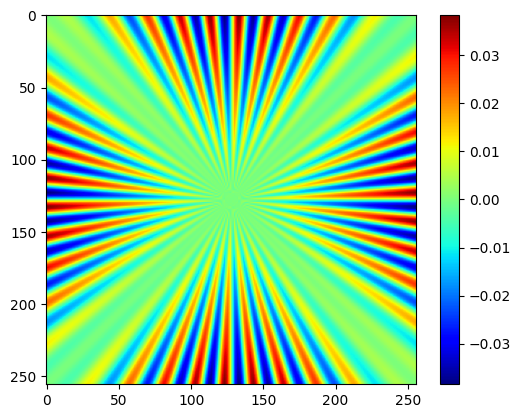

PyObject <matplotlib.colorbar.Colorbar object at 0x7f134fb58880>

In [70]:
imshow(Ur[:,:,128],cmap="jet");colorbar()

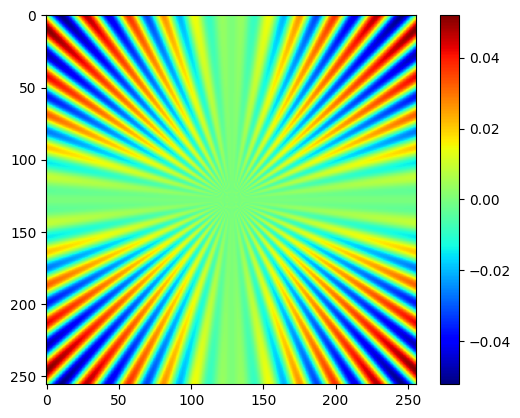

PyObject <matplotlib.colorbar.Colorbar object at 0x7f134fa9a3a0>

In [71]:
imshow(Uθ[:,:,128],cmap="jet");colorbar()